# Perceptrón

Danae Sánchez Villegas 136040


In [7]:
import pandas as pd
import numpy as np
import csv
import random
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

# Funciones

In [18]:
def salida(x,w0,W):
    sum=0
    
    for i in range(len(x)):
        sum=sum+x[i]*W[i]
    sum=sum+w0
    if (sum>=0):
        sum=1
    else:
        sum=0
    return sum
 
def entrenaSinReg(X,w0,W,y,n):
    
    nu=0.01
    
    for i in range(n):
        error=y[i]-salida(X[i],w0,W)
        w0=w0+nu*error
            
        for j in range(len(X[i])):
            W[j]=W[j]+nu*(error*X[i][j])
    
    return w0,W

def entrena(X,w0,W,y,n,lbd):
    
    nu=0.01

    for i in range(n):
        error=y[i]-salida(X[i],w0,W)
        w0=w0+nu*error
            
        for j in range(len(X[i])):
            W[j]=W[j]+nu*(error*X[i][j]-lbd*W[j])
    
    return w0,W

def errorClasificador(X,y,w0,W):
    i=0
    suma=0
    for x in X:
        modelo=salida(x,w0,W) 
        if(y[i]>=0):
            real=1
        else:
            real=0
        if(real==modelo):
            suma+=1
        i=i+1
    
    return suma/float(len(y))  
    

# Importar Datos

In [19]:
dia = csv.excel()
df = pd.read_csv("regLin4.csv")

In [20]:
 X_train, X_test, Y_train, Y_test = train_test_split(df[['X']],df[['y']], train_size=0.75)

# Probar

In [21]:
W=[random.random() for i in range(1)]
w0=random.random()

In [22]:
for i in range(800):
    w0,W=entrenaSinReg(np.asarray(X_test),w0,W,np.asarray(Y_test),len(X_test))

error=errorClasificador(np.asarray(X_test),np.asarray(Y_test),w0[0],W)


In [23]:
w0

array([ 6.84964792])

In [24]:
W[0]

array([-0.22987964])

In [25]:
error

0.3023255813953488

In [26]:
bd=[-w0/W[0] for x in range (len(Y_test))]

# Modelo

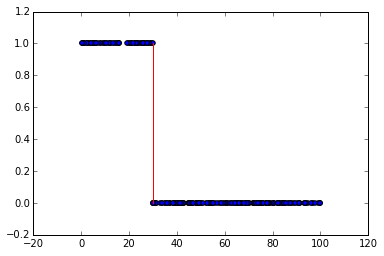

In [27]:
plt.scatter(X_test,Y_test)
plt.plot(bd,Y_test,color='red')